## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

### Load and inspect the dataset

In [1]:
import pandas as pd

/Users/selmadoganata/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/selmadoganata/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the dataset to explore its structure and check for any missing or anomalous data

In [2]:
df=pd.read_csv('datasets/worldwide_browser_trends.csv', parse_dates=["Month"], index_col = 'Month')

### Displaying basic information to confirm the data types and ensure 'Month' is set as the index.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


### Plotting the dataset to get an overview of browser popularity trends over time.

<Axes: title={'center': 'Initial Overview of Browser Trends'}, xlabel='Month'>

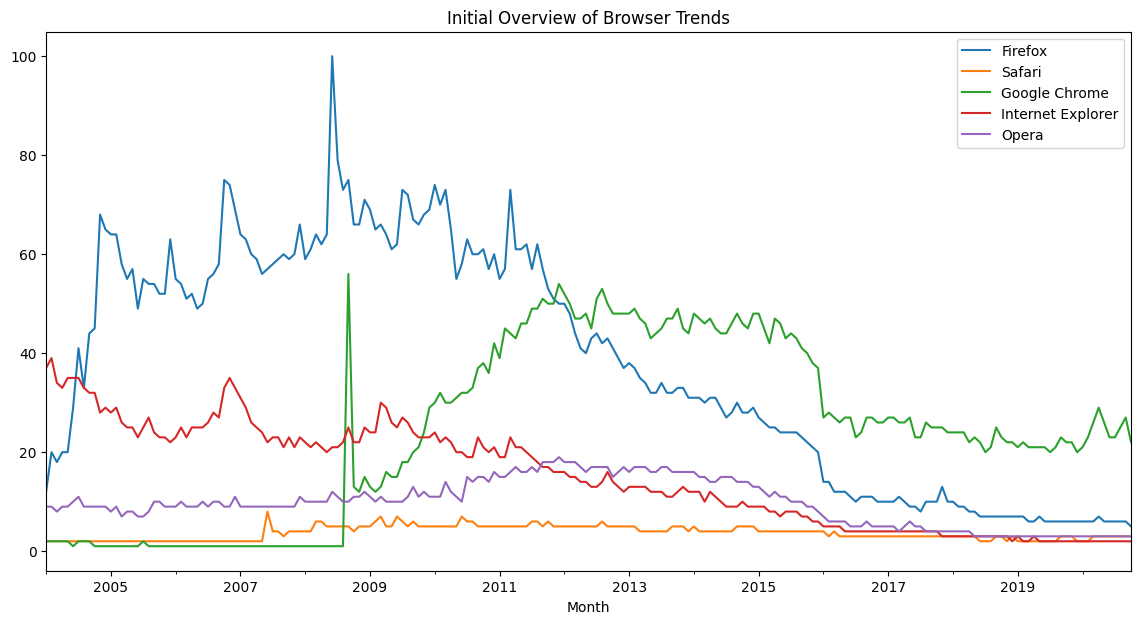

In [4]:
df.plot(figsize=(14, 7), title='Initial Overview of Browser Trends')

### Showing the first 10 rows to understand the data layout

In [5]:
df.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9
2004-06-01,29,2,1,35,10
2004-07-01,41,2,2,35,11
2004-08-01,33,2,2,33,9
2004-09-01,44,2,2,32,9


### Calculating a rolling six-month average to smooth out short-term fluctuations and highlight longer-term trends

<Axes: title={'center': 'Six-Month Rolling Average of Browser Trends'}, xlabel='Month'>

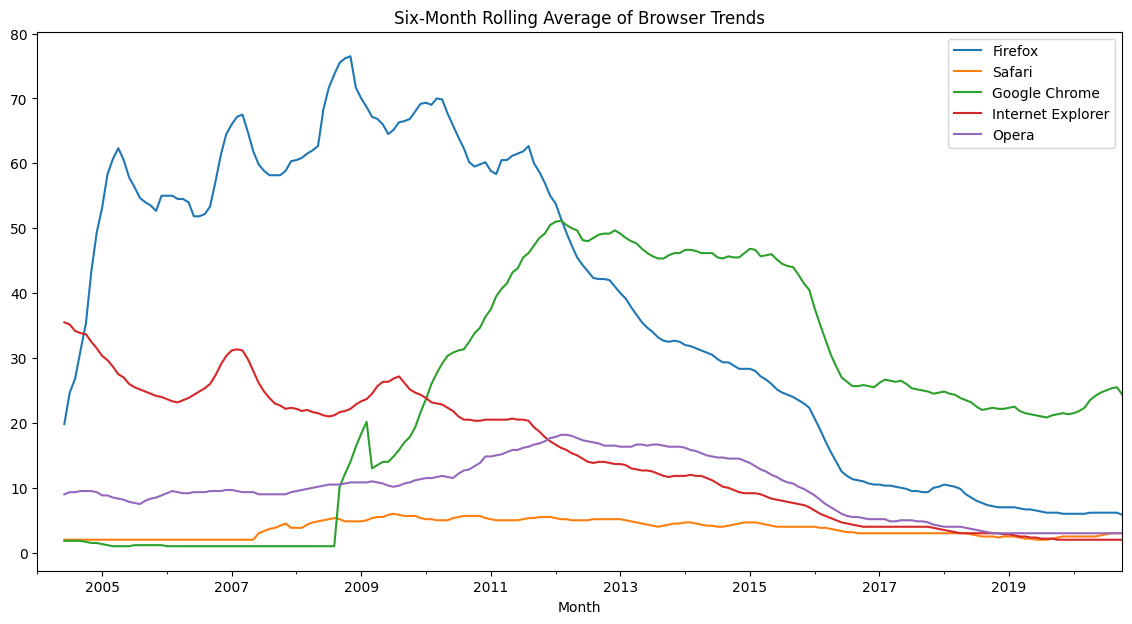

In [6]:
rolling_six = df.rolling(window=6).mean()
rolling_six.head(20)
rolling_six.plot(figsize=(14, 7), title='Six-Month Rolling Average of Browser Trends')

### Percentage Change Analysis\nCalculating the quarterly percentage change to observe significant growth or decline periods for each browser

In [7]:
pct_change_quarterly = df.pct_change(3)*100
pct_change_quarterly

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,66.666667,0.0,0.000000,-10.810811,0.0
2004-05-01,0.000000,0.0,0.000000,-10.256410,0.0
...,...,...,...,...,...
2020-06-01,0.000000,0.0,-11.538462,0.000000,0.0
2020-07-01,-14.285714,0.0,-20.689655,0.000000,0.0
2020-08-01,0.000000,0.0,-3.846154,0.000000,0.0


### Focusing on data from 2009 onwards for detailed analysis of significant browser trend shifts

array([<Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>, <Axes: xlabel='Month'>,
       <Axes: xlabel='Month'>], dtype=object)

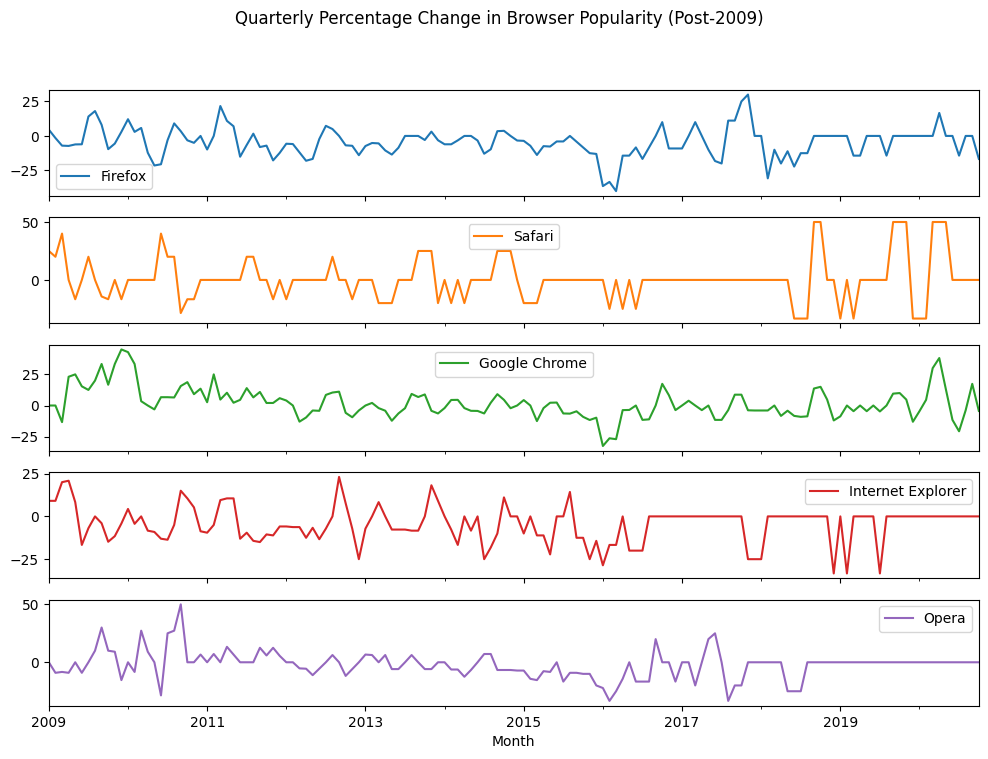

In [8]:
pct_change_quarterly = pct_change_quarterly.loc['2009':]
pct_change_quarterly.plot(subplots=True, figsize=(12, 8), title='Quarterly Percentage Change in Browser Popularity (Post-2009)')

### Creating a focused analysis to visualize how Chrome’s popularity evolved in specific milestone years

In [9]:
chrome_trends = pd.DataFrame()

for year in ['2009', '2012','2015', '2018']:
    chrome_trends_per_year = df.loc[year, ['Google Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Google Chrome':year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, chrome_trends_per_year], axis=1)

### Visualizing Chrome’s growth trajectory in key years to highlight its rapid rise

<Axes: title={'center': 'Yearly Trends of Google Chrome in 2009, 2012, 2015, and 2018'}>

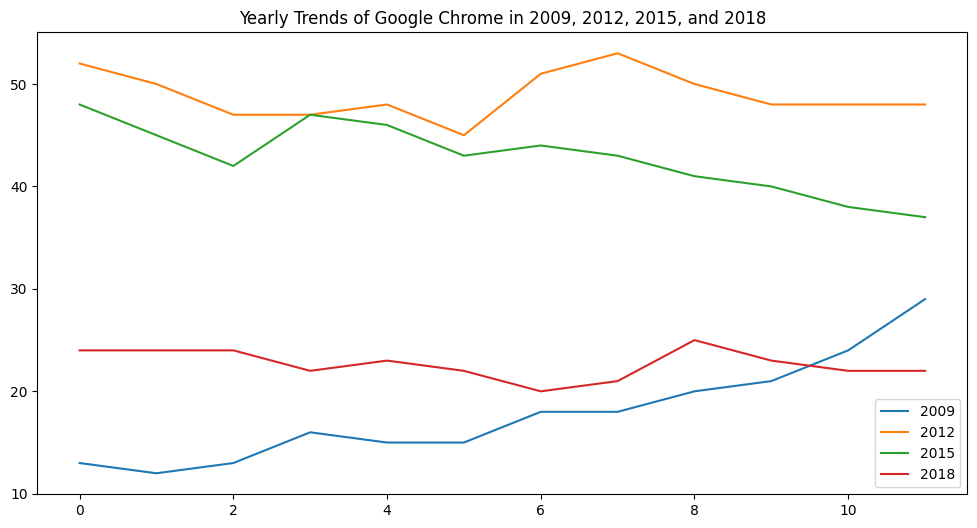

In [11]:
chrome_trends.plot(title='Yearly Trends of Google Chrome in 2009, 2012, 2015, and 2018', figsize=(12, 6))

### Additional Analysis: Identify Crossovers and Annotate

In [12]:
crossover_points = df[df['Google Chrome'] > df['Internet Explorer']]
crossover_first_month = crossover_points.index.min()

### Highlighting important moments when Chrome surpassed other browsers

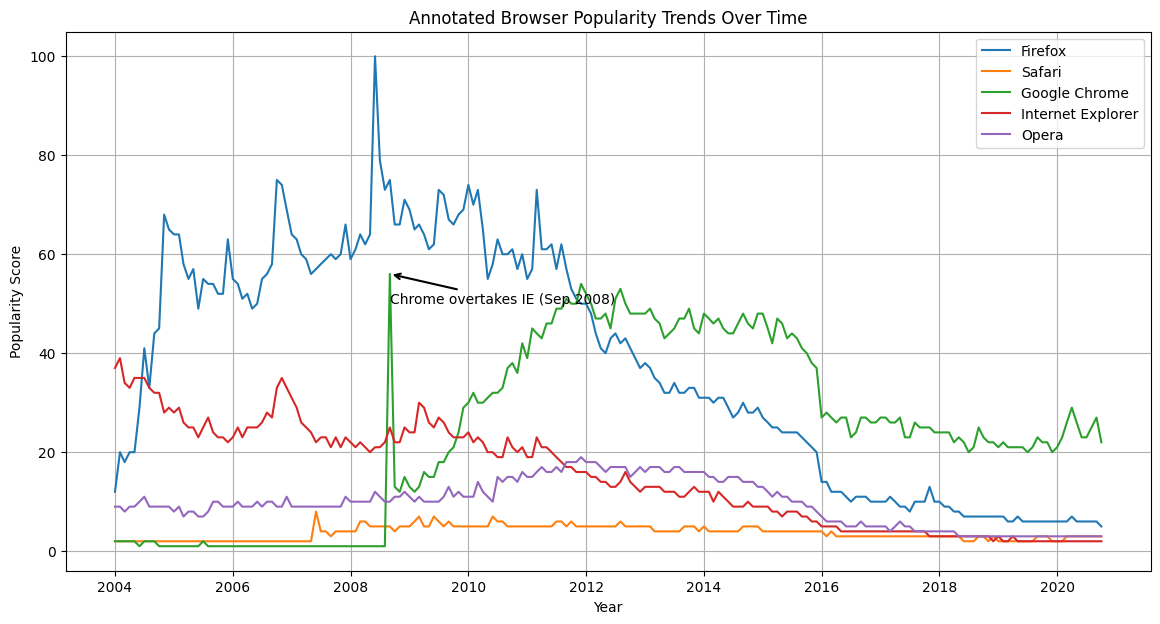

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.annotate('Chrome overtakes IE (Sep 2008)', xy=(crossover_first_month, df.loc[crossover_first_month, 'Google Chrome']),
             xytext=(crossover_first_month, 50), arrowprops=dict(arrowstyle='->', lw=1.5))
plt.title('Annotated Browser Popularity Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.legend()
plt.grid(True)
plt.show()

### Highlighting Peaks and Troughs for Each Browser

Peaks:
Firefox             2008-06-01
Safari              2007-06-01
Google Chrome       2008-09-01
Internet Explorer   2004-02-01
Opera               2011-12-01
dtype: datetime64[ns]

Troughs:
Firefox             2020-10-01
Safari              2004-01-01
Google Chrome       2004-06-01
Internet Explorer   2018-12-01
Opera               2018-05-01
dtype: datetime64[ns]


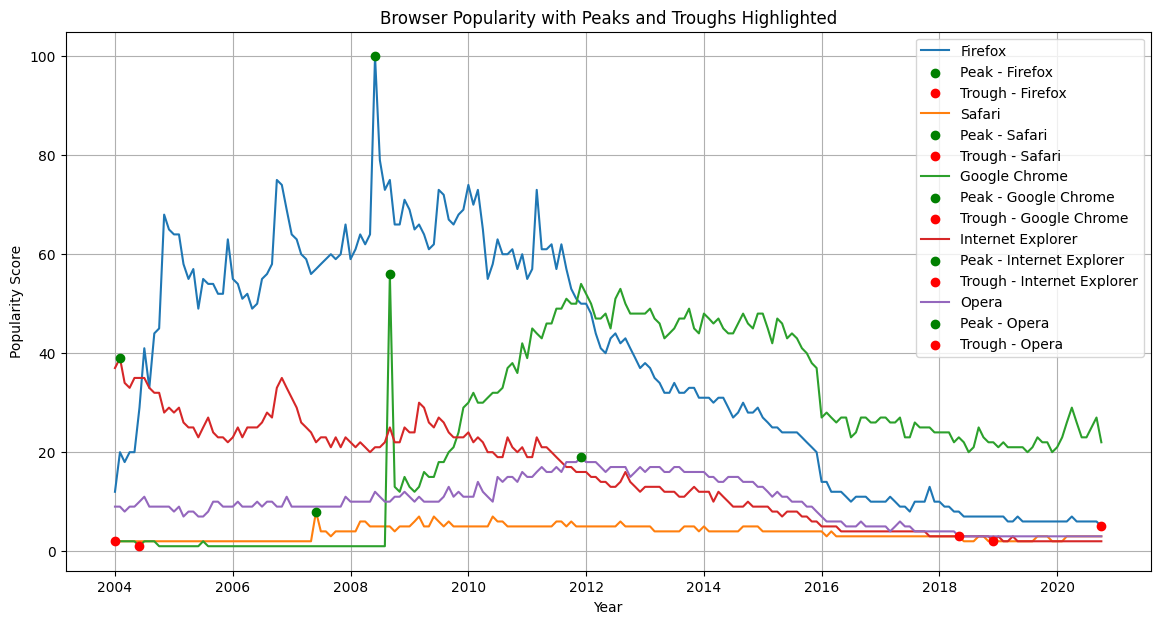

In [14]:
peaks = df.idxmax()
troughs = df.idxmin()

print("Peaks:")
print(peaks)
print("\nTroughs:")
print(troughs)

plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
    plt.scatter(peaks[column], df.loc[peaks[column], column], color='green', label=f'Peak - {column}', zorder=5)
    plt.scatter(troughs[column], df.loc[troughs[column], column], color='red', label=f'Trough - {column}', zorder=5)
plt.title('Browser Popularity with Peaks and Troughs Highlighted')
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.legend()
plt.grid(True)
plt.show()


### Analyzing the Market Share Differences Over Time

##### When the plot is negative, it means that another browser (the "next most popular") was still more popular than Chrome.
##### When the plot crosses above zero, it indicates that Chrome has surpassed all other browsers and became the most popular.
##### The highest positive values suggest periods when Chrome had a significant lead over the second most popular browser

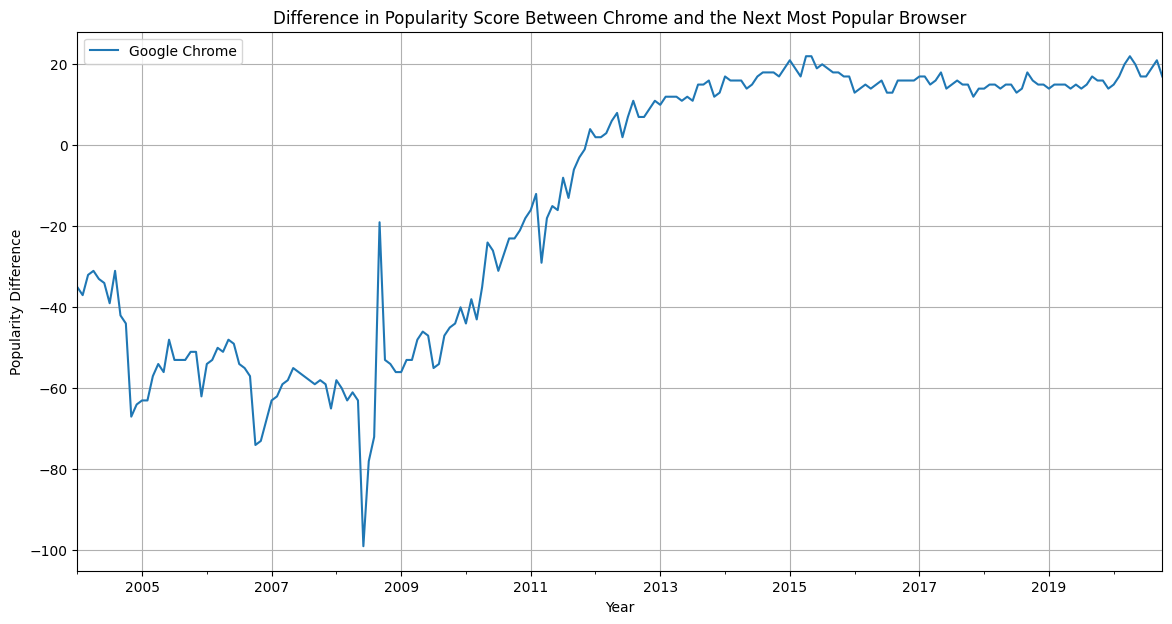

In [17]:
chrome_diffs = df[['Google Chrome']].subtract(df[['Firefox', 'Internet Explorer', 'Safari', 'Opera']].max(axis=1), axis=0)

chrome_diffs.plot(figsize=(14, 7), title='Difference in Popularity Score Between Chrome and the Next Most Popular Browser')
plt.xlabel('Year')
plt.ylabel('Popularity Difference')
plt.grid(True)
plt.show()


#### Determining the Next Most Popular Browser

In [22]:

next_popular_browser = df[['Firefox', 'Internet Explorer', 'Safari', 'Opera']].idxmax(axis=1)

chrome_diffs['Next Most Popular Browser'] = next_popular_browser

chrome_diffs.head(10)


,Google Chrome,Next Most Popular Browser
Month,,
2004-01-01,-35,Internet Explorer
2004-02-01,-37,Internet Explorer
2004-03-01,-32,Internet Explorer
2004-04-01,-31,Internet Explorer
2004-05-01,-33,Internet Explorer
2004-06-01,-34,Internet Explorer
2004-07-01,-39,Firefox
2004-08-01,-31,Firefox
2004-09-01,-42,Firefox


### Analyzing Time to Overtake Other Browsers

In [16]:
for browser in ['Firefox', 'Internet Explorer', 'Safari', 'Opera']:
    crossover_point = df[df['Google Chrome'] > df[browser]].index.min()
    print(f"Chrome overtook {browser} in {crossover_point.strftime('%B %Y')}")


Chrome overtook Firefox in December 2011
Chrome overtook Internet Explorer in September 2008
Chrome overtook Safari in September 2008
Chrome overtook Opera in September 2008
